In [1]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision as tv
import numpy as np

In [2]:
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()
print(t.__version__)

1.8.1+cpu


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import time

In [4]:
class LeNet(nn.Module):
    
    def __init__(self) -> None:
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet = LeNet()
print(lenet)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
for name, param in lenet.named_parameters():
    print(name, ":", param.size())

conv1.weight : torch.Size([6, 3, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [6]:
# 数据预处理，相当于提前定义了怎么处理数据：
# 因为读入的数据为numpy格式，所以我们要先将其转换为tensor格式，
# 然后对其进行归一化，有三个通道需要归一化，而第一个为均值，第二个为标准差
transform = transforms.Compose([
    transforms.ToTensor(), # 转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# 训练集
trainset = tv.datasets.CIFAR10(
    root='/pytorch/Data/',
    train=True,
    download=False,
    transform=transform
)

# 迭代器
trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# 测试集
testset = tv.datasets.CIFAR10(
    root='/pytorch/Data/',
    train=False,
    download=False,
    transform=transform
)

# 迭代器
testloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

ship


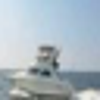

In [7]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

In [8]:
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

frog       deer       truck       truck


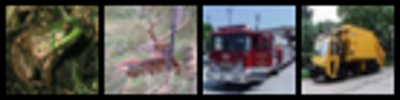

In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('       '.join(classes[labels]))
show(tv.utils.make_grid((images + 1) / 2)).resize((400, 100))

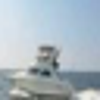

In [10]:
show(((data+1)/2)).resize((100, 100))

In [11]:
# 误差
criterion = nn.CrossEntropyLoss()   # 采用交叉熵
# 优化器
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum=0.9)   # SGD优化算法

In [12]:
# 训练网络
epoches = 3
losses = []
t.set_num_threads(8)   # 设置pytorch多线程运算时占用的线程数https://blog.csdn.net/jacke121/article/details/84305727?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162830660116780357276701%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=162830660116780357276701&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-84305727.first_rank_v2_pc_rank_v29&utm_term=torch.set_num_threads&spm=1018.2226.3001.4187
for epoch in range(epoches):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images, labels = data
        target = lenet(images)

        loss = criterion(target, labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        if i % 1999 == 0 and i > 1:
            print(f'epoch: {epoch+1}   samples: {i/1999 * 2000} loss: {running_loss / 20000}')
            losses.append(running_loss / 20000)
            running_loss = 0.0

epoch: 1   samples: 2000.0 loss: 0.21976564857959746
epoch: 1   samples: 4000.0 loss: 0.18750135827064515
epoch: 1   samples: 6000.0 loss: 0.17118642280399798
epoch: 1   samples: 8000.0 loss: 0.16181891503930093
epoch: 1   samples: 10000.0 loss: 0.15434627611786128
epoch: 1   samples: 12000.0 loss: 0.14648487135842442
epoch: 2   samples: 2000.0 loss: 0.1395673820063472
epoch: 2   samples: 4000.0 loss: 0.140284929266572
epoch: 2   samples: 6000.0 loss: 0.13698040153458715
epoch: 2   samples: 8000.0 loss: 0.13554105187021195
epoch: 2   samples: 10000.0 loss: 0.13329518935456872
epoch: 2   samples: 12000.0 loss: 0.1323515387058258
epoch: 3   samples: 2000.0 loss: 0.12620951183773577
epoch: 3   samples: 4000.0 loss: 0.12230861193034798
epoch: 3   samples: 6000.0 loss: 0.12209735997766256
epoch: 3   samples: 8000.0 loss: 0.12211512226238846
epoch: 3   samples: 10000.0 loss: 0.12165547264926135
epoch: 3   samples: 12000.0 loss: 0.12242041307240725


In [14]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = lenet(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 60 %


(0.0, 0.26976564857959745)

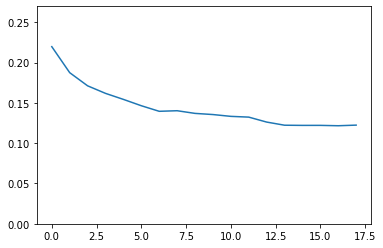

In [17]:
# 误差的图像
plt.plot(losses)
plt.ylim(0, max(losses) + 0.05)